# No-show Appoiments: Analysis and Prediction.

I am a beginner in Data Analysis and very passionte about it.I have chosen No-show appointment dataset for the analysis.
This is my first Data Analysis project.

# Question Phase.

I would like to pose two questions based on this data:

1.Is their any gender-based differences in doctor visits and why?

2.What are the factors that a patient will show up or no-show up for their scheduled appointment?

Before answering this question,first we have to acquire the data and then clean it for the analysis. 

# Data Acquistition.

In [242]:
# We are loading all the required libraries. Libraries for reading CSV File, Data Exploration, Visualization and Data Modeling 
# are all loaded in the cell.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.pyplot as plt 
import seaborn as sns
from datetime import datetime
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
noshow_appointments = pd.read_csv("https://d17h27t6h515a5.cloudfront.net/topher/2017/October/59dd2e9a_noshowappointments-kagglev2-may-2016/noshowappointments-kagglev2-may-2016.csv")
print (noshow_appointments.head())

      PatientId  AppointmentID Gender          ScheduledDay  \
0  2.987250e+13        5642903      F  2016-04-29T18:38:08Z   
1  5.589978e+14        5642503      M  2016-04-29T16:08:27Z   
2  4.262962e+12        5642549      F  2016-04-29T16:19:04Z   
3  8.679512e+11        5642828      F  2016-04-29T17:29:31Z   
4  8.841186e+12        5642494      F  2016-04-29T16:07:23Z   

         AppointmentDay  Age      Neighbourhood  Scholarship  Hipertension  \
0  2016-04-29T00:00:00Z   62    JARDIM DA PENHA            0             1   
1  2016-04-29T00:00:00Z   56    JARDIM DA PENHA            0             0   
2  2016-04-29T00:00:00Z   62      MATA DA PRAIA            0             0   
3  2016-04-29T00:00:00Z    8  PONTAL DE CAMBURI            0             0   
4  2016-04-29T00:00:00Z   56    JARDIM DA PENHA            0             1   

   Diabetes  Alcoholism  Handcap  SMS_received No-show  
0         0           0        0             0      No  
1         0           0        0      

In [243]:
# Assign the dataset to a variable and take a sample of the set.
df = pd.DataFrame(noshow_appointments)
df.head(10)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No
5,9.598513e+13,5626772,F,2016-04-27T08:36:51Z,2016-04-29T00:00:00Z,76,REPÚBLICA,0,1,0,0,0,0,No
6,7.336882e+14,5630279,F,2016-04-27T15:05:12Z,2016-04-29T00:00:00Z,23,GOIABEIRAS,0,0,0,0,0,0,Yes
7,3.449833e+12,5630575,F,2016-04-27T15:39:58Z,2016-04-29T00:00:00Z,39,GOIABEIRAS,0,0,0,0,0,0,Yes
8,5.639473e+13,5638447,F,2016-04-29T08:02:16Z,2016-04-29T00:00:00Z,21,ANDORINHAS,0,0,0,0,0,0,No
9,7.812456e+13,5629123,F,2016-04-27T12:48:25Z,2016-04-29T00:00:00Z,19,CONQUISTA,0,0,0,0,0,0,No


In [244]:
# Displays some necessary features.
# df.describe()

# Data Cleaning.

There are columns which have typos.So,we have to first clear them,so that their is no confusion later on.

In [245]:
# Rename the columns with typos.
noshow_appointments.rename(columns = {'Hipertension':'Hypertension',
                                      'Handcap':'Handicap','No-show':'Noshow'},inplace=True)
print (noshow_appointments.columns)
noshow_appointments.head

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hypertension',
       'Diabetes', 'Alcoholism', 'Handicap', 'SMS_received', 'Noshow'],
      dtype='object')


<bound method NDFrame.head of            PatientId  AppointmentID Gender          ScheduledDay  \
0       2.987250e+13        5642903      F  2016-04-29T18:38:08Z   
1       5.589978e+14        5642503      M  2016-04-29T16:08:27Z   
2       4.262962e+12        5642549      F  2016-04-29T16:19:04Z   
3       8.679512e+11        5642828      F  2016-04-29T17:29:31Z   
4       8.841186e+12        5642494      F  2016-04-29T16:07:23Z   
5       9.598513e+13        5626772      F  2016-04-27T08:36:51Z   
6       7.336882e+14        5630279      F  2016-04-27T15:05:12Z   
7       3.449833e+12        5630575      F  2016-04-27T15:39:58Z   
8       5.639473e+13        5638447      F  2016-04-29T08:02:16Z   
9       7.812456e+13        5629123      F  2016-04-27T12:48:25Z   
10      7.345362e+14        5630213      F  2016-04-27T14:58:11Z   
11      7.542951e+12        5620163      M  2016-04-26T08:44:12Z   
12      5.666548e+14        5634718      F  2016-04-28T11:33:51Z   
13      9.113946e+

In [246]:
df = pd.DataFrame(noshow_appointments)
#df.describe()

We have to check for any error values and NaNs in data before prediction.For that,

In [247]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hypertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handicap          110527 non-null int64
SMS_received      110527 non-null int64
Noshow            110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


From the above info,it is clear that we have no NANs and missing values. 

First, we are going to convert the data type of AppointmentDay and ScheduledDay to DateTime format.

In [248]:
# Converting AppointmentDay and ScheduledDay from object type to datetime64[ns].
df.AppointmentDay = df.AppointmentDay.apply(np.datetime64)
df['WeekDay'] = df['AppointmentDay'].dt.day
df.ScheduledDay = df.ScheduledDay.apply(np.datetime64)
df['DayScheduled'] = df['ScheduledDay'].dt.day

Next, we are going to drop PatientId and AppointmentID as they are of no use for the prediction and also the object type columns Noshow and Gender are changing into integers.

In [249]:
# Dropping 'PatientId' and 'AppointmentID' as they are just some system generated numbers which are not at all important 
# in our analysis.
df.drop(['PatientId', 'AppointmentID'], axis=1, inplace=True)
# Converting 'Gender' and 'Noshow' from object format to integer format.
df.Gender = df.Gender.apply(lambda x: 1 if x == 'M' else 0)
df['Noshow'] = df['Noshow'].replace('Yes',1)
df['Noshow'] = df['Noshow'].replace('No',0)

In [250]:
# Trying a sample dataset.
df.head(5)

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,Noshow,WeekDay,DayScheduled
0,0,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,0,29,29
1,1,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,0,29,29
2,0,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,0,29,29
3,0,2016-04-29 17:29:31,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,0,29,29
4,0,2016-04-29 16:07:23,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,0,29,29


In [251]:
#df.info()

Let us check the unique values of some factors in the dataset.

In [252]:
# Print Unique Values
print("Unique Values in 'Gender' => {}".format(df.Gender.unique()))
print("Unique Values in 'Age' => {}".format(df.Age.unique()))
print("Unique Values in 'Scholarship' => {}".format(df.Scholarship.unique()))
print("Unique Values in 'Neighbourhood' => {}".format(df.Neighbourhood.unique()))
print("Unique Values in 'Hypertension' => {}".format(df.Hypertension.unique()))
print("Unique Values in 'Diabetes' => {}".format(df.Diabetes.unique()))
print("Unique Values in 'Alcoholism' => {}".format(df.Alcoholism.unique()))
print("Unique Values in 'Handicap' => {}".format(df.Handicap.unique()))
print("Unique Values in 'SMS_received' => {}".format(df.SMS_received.unique()))
print("Unique Values in 'WeekDay' => {}".format(df.WeekDay.unique()))
print("Unique Values in 'DayScheduled' => {}".format(df.DayScheduled.unique()))
print("Unique Values in 'Noshow' => {}".format(df.Noshow.unique()))

Unique Values in 'Gender' => [0 1]
Unique Values in 'Age' => [ 62  56   8  76  23  39  21  19  30  29  22  28  54  15  50  40  46   4
  13  65  45  51  32  12  61  38  79  18  63  64  85  59  55  71  49  78
  31  58  27   6   2  11   7   0   3   1  69  68  60  67  36  10  35  20
  26  34  33  16  42   5  47  17  41  44  37  24  66  77  81  70  53  75
  73  52  74  43  89  57  14   9  48  83  72  25  80  87  88  84  82  90
  94  86  91  98  92  96  93  95  97 102 115 100  99  -1]
Unique Values in 'Scholarship' => [0 1]
Unique Values in 'Neighbourhood' => ['JARDIM DA PENHA' 'MATA DA PRAIA' 'PONTAL DE CAMBURI' 'REPÚBLICA'
 'GOIABEIRAS' 'ANDORINHAS' 'CONQUISTA' 'NOVA PALESTINA' 'DA PENHA'
 'TABUAZEIRO' 'BENTO FERREIRA' 'SÃO PEDRO' 'SANTA MARTHA' 'SÃO CRISTÓVÃO'
 'MARUÍPE' 'GRANDE VITÓRIA' 'SÃO BENEDITO' 'ILHA DAS CAIEIRAS'
 'SANTO ANDRÉ' 'SOLON BORGES' 'BONFIM' 'JARDIM CAMBURI' 'MARIA ORTIZ'
 'JABOUR' 'ANTÔNIO HONÓRIO' 'RESISTÊNCIA' 'ILHA DE SANTA MARIA'
 'JUCUTUQUARA' 'MONTE BELO' 'MÁRIO 

In Age factor,we can see that there is a negative value and there are some strange values like ages above 100.So,what we are 
going to do is that we are considering only values between 0 and 95.Eventhough there are possibilities to live after 100 years,
here I will treat the ages greater than 95 as outliers.
Once I have made my assumptions, it is time to remove the impossible and the absurd from the data.

In [253]:
# Considering ages between 0 and 95 including both and drop the rest by considering them as outliers.
df.drop(df[(df.Age < 0) & (df.Age > 95)].index, inplace = True)

In [254]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110527 entries, 0 to 110526
Data columns (total 14 columns):
Gender            110527 non-null int64
ScheduledDay      110527 non-null datetime64[ns]
AppointmentDay    110527 non-null datetime64[ns]
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hypertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handicap          110527 non-null int64
SMS_received      110527 non-null int64
Noshow            110527 non-null int64
WeekDay           110527 non-null int64
DayScheduled      110527 non-null int64
dtypes: datetime64[ns](2), int64(11), object(1)
memory usage: 12.6+ MB


Now,our dataset is almost cleaned and we are stepping into the Exploitary Data Analysis(EDA) phase.

# Data Exploration

I am going to start exploring the data.

# Analyzing the probability of showing up with respect to different features.

# 1.Age and Gender.

First I have to analyse whether their is any gender-based difference and the age of patients are affect in visiting the doctor?If yes,why? 

Analysing the age distibution using Histogram.

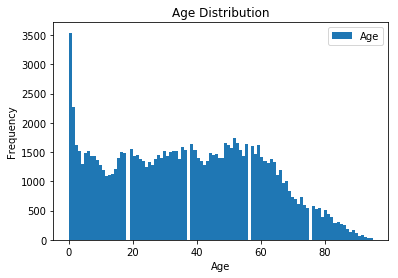

In [255]:
# Age Distribution
df.plot(kind = "hist",y = "Age",bins = 100,range = (0,95)) 
plt.title('Age Distribution')
plt.xlabel('Age')
plt.show() 

From the histogram above,people who are in age group of 20 to 60 years are most likely into showing up. 

Text(0.5,1,'Gender based difference')

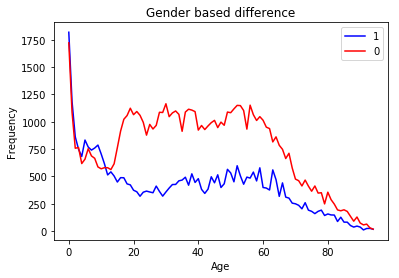

In [256]:
# Analysing the distribution among genders with their age.
range_df = pd.DataFrame()
range_df['Age'] = range(95)
men = range_df.Age.apply(lambda x:len(df[(df.Age == x) & (df.Gender == 1)]))
women = range_df.Age.apply(lambda x:len(df[(df.Age == x) & (df.Gender == 0)]))
plt.plot(range(95), men, color = 'b')
plt.plot(range(95), women, color = 'r')
plt.legend([1,0])
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Gender based difference')

# Women are most likely to visit the doctor more than men.

From the above graph,it is clear that women are almost twice as likely to visit the doctor. But it is effective in a certain age group.

Starting from around the age of 20,women are more often visits the doctor till around the age 60 than men. The reason may be in both genders,women requires more visits due to their health issues than men like gynac related problems,other high risk problems like breast cancer and normal aged problem like weight gain/loss,thyroid,etc.We can't predict the reason exactly but can try to explain with the given medical conditions in the dataset.

# 2.Medical Conditions.

Text(0,0.5,'Frequency')

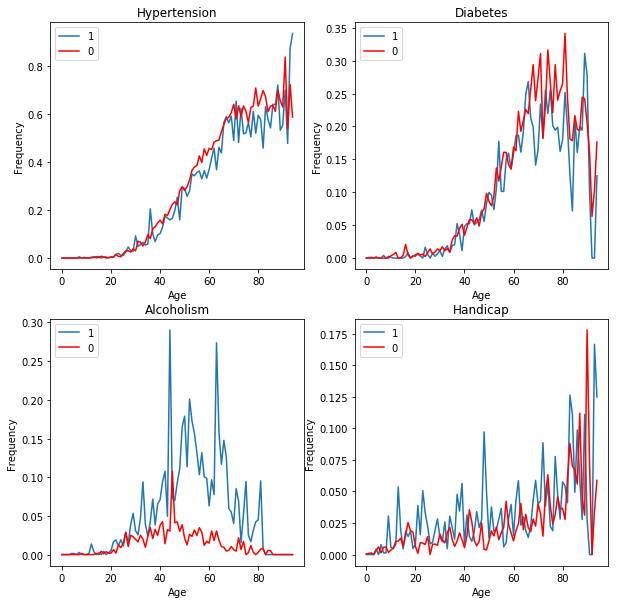

In [257]:
# Analysing and plotting the distribution among different medical conditions of both Genders with their age.
men_Hypertension = range_df[range_df.columns[0]].apply(lambda x: len(df[(df.Age == x) & (df.Gender == 1) & (df.Hypertension == 1)]))
women_Hypertension = range_df[range_df.columns[0]].apply(lambda x: len(df[(df.Age == x) & (df.Gender == 0) & (df.Hypertension == 1)]))

men_Diabetes = range_df[range_df.columns[0]].apply(lambda x: len(df[(df.Age == x) & (df.Gender == 1) & (df.Diabetes == 1)]))
women_Diabetes = range_df[range_df.columns[0]].apply(lambda x: len(df[(df.Age == x) & (df.Gender == 0) & (df.Diabetes == 1)]))

men_Alcoholism = range_df[range_df.columns[0]].apply(lambda x: len(df[(df.Age == x) & (df.Gender == 1) & (df.Alcoholism == 1)]))
women_Alcoholism = range_df[range_df.columns[0]].apply(lambda x: len(df[(df.Age == x) & (df.Gender == 0) & (df.Alcoholism == 1)]))

men_Handicap = range_df[range_df.columns[0]].apply(lambda x: len(df[(df.Age == x) & (df.Gender == 1) & (df.Handicap == 1)]))
women_Handicap = range_df[range_df.columns[0]].apply(lambda x: len(df[(df.Age == x) & (df.Gender == 0) & (df.Handicap == 1)]))

plt.figure(figsize = (10,10))
plt.subplot(2,2,1)
plt.plot(range(95),men_Hypertension/men)
plt.plot(range(95),women_Hypertension/women, color = 'r')
plt.title('Hypertension')
plt.legend([1,0], loc = 2)
plt.xlabel('Age')
plt.ylabel('Frequency')

plt.subplot(2,2,2)
plt.plot(range(95),men_Diabetes/men)
plt.plot(range(95),women_Diabetes/women, color = 'r')
plt.title('Diabetes')
plt.legend([1,0], loc = 2)
plt.xlabel('Age')
plt.ylabel('Frequency')


plt.subplot(2,2,3)
plt.plot(range(95),men_Alcoholism/men)
plt.plot(range(95),women_Alcoholism/women, color = 'r')
plt.title('Alcoholism')
plt.legend([1,0], loc = 2)
plt.xlabel('Age')
plt.ylabel('Frequency')


plt.subplot(2,2,4)
plt.plot(range(95),men_Handicap/men)
plt.plot(range(95),women_Handicap/women, color = 'r')
plt.title('Handicap')
plt.legend([1,0], loc = 2)
plt.xlabel('Age')
plt.ylabel('Frequency')




# There are some specific conditions for doctors visit in both Genders.

From the graph,the two conditions Hypertension and Handicapness are seen in almost both Genders in which it is more after 60 years to Hypertension and after 80 years to Handicapness.In women who are between 60 and 80 years of age,Diabetes are common whereas Alcoholism is more common in men than women.

# 3.AppointmentDay

Does the AppointmentDay plays any role for show-up or No-show? So,for that I try to plot a graph 
from which I can gather some information. 

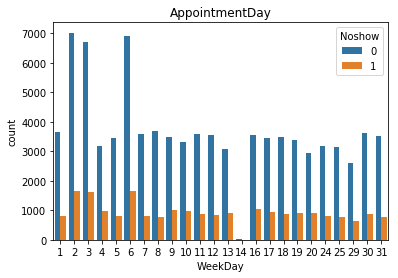

In [258]:
app_day = sns.countplot(x = 'WeekDay', hue = 'Noshow', data = df)
app_day.set_title('AppointmentDay')
plt.show()

From the above graph distribution,we can say that most of the appointments are made on weekdays and not on the weekends.
The most popular appointment days are in the middle of the week,that is,Tuesdays,Wednesdays and Thursdays;
whereas Mondays and Fridays are the least popular days for appointments.

# 4.SMS_received.

Now,we are going to check whether the SMS-received to the patients play any role in show-up or No-show.

Text(0.5,1,'SMS_received')

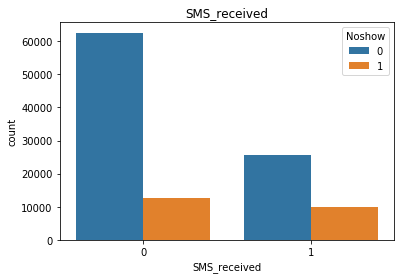

In [259]:
# Plotting SMS_received.
sms = sns.countplot(x = 'SMS_received',hue = 'Noshow',data = df)
sms.set_title('SMS_received')

As expected, patients who receive an SMS reminder are more likely to show up for their appointment.

# 5.Scholarship.

Next we find whether the scholarship granted to some patients will affect the show-up.

Text(0.5,1,'Scholarship received')

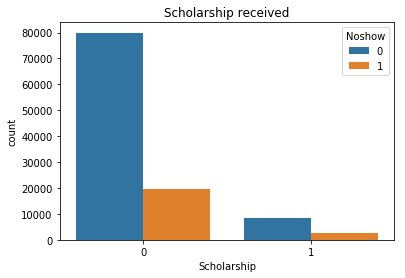

In [260]:
# Plotting Scholarship received with people who are showing up or not.
schrsp = sns.countplot(x = 'Scholarship',hue = 'Noshow',data = df)
schrsp.set_title('Scholarship received')

There are only fewer people received scholarships,but it is evident that people who have scholarships 
are more likely to not show up to appointments than people who don't have scholarships.

# 6.Neighbourhood.

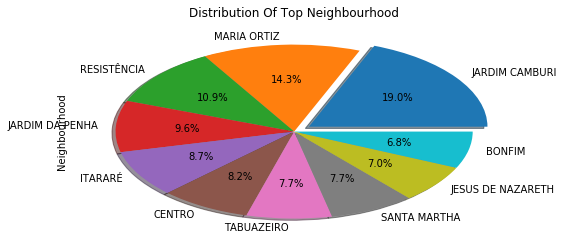

In [261]:
# Plotting the distribution of Neighbourhood with pie-chart.
plt.subplots(figsize=(8,4))
df['Neighbourhood'].value_counts()[:10].plot(kind='pie',autopct='%1.1f%%',shadow=True,explode=[0.1,0,0,0,0,0,0,0,0,0])
plt.title('Distribution Of Top Neighbourhood')
plt.show()

As most of the Neighbourhood have 80% show rate,this feature may not add much value while building a model to help us 
determine which segment of patients are turning up for a visit the most.So,we are dropping this factor in our analysis.

# 7.ScheduledDay

Now,we are finding whether ScheduledDay has some role in Noshow or showing up.

Text(0.5,1,'ScheduledDay')

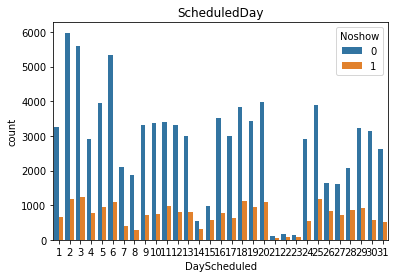

In [262]:
# plotting ScheduledDay
datescheduled = sns.countplot(x = 'DayScheduled', hue = 'Noshow', data = df)
datescheduled.set_title('ScheduledDay')

From the graph distribution,most of the patients are showing up on their scheduled day.

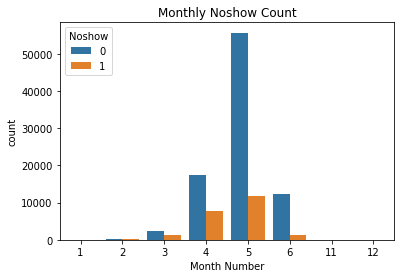

In [263]:
df['Month Number'] = df['ScheduledDay'].dt.month
monthly_showup = sns.countplot(x = "Month Number", hue = "Noshow", data = df)
monthly_showup.set_title("Monthly Noshow Count")
plt.show()

From the graph,it is clear that middle months are such that people are showing up for their appointments in a year.

# Prediction.

In [264]:
#df.info()
df.head()

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,Noshow,WeekDay,DayScheduled,Month Number
0,0,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,0,29,29,4
1,1,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,0,29,29,4
2,0,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,0,29,29,4
3,0,2016-04-29 17:29:31,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,0,29,29,4
4,0,2016-04-29 16:07:23,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,0,29,29,4


We know that there are 14 columns in total.Of these there is 1 dependent variable and 13 independent variables.
Among those 13 independent variables, we are ignoring Neighbourhood as it has not much to do in the prediction.
Also,ScheduledDay and AppointmentDay are formating already,so we are removing those 2 columns too.

Now, we are going to split the data into training and testing data;such that the training set has 60% of the data and 
the testing set has 40%. Here, we are using sklearn Logistic Regression function to train and attempt to predict
the noshow status of the testing data.

In [265]:
# Using sklearn Logistic Regression funtion to predict the accuracy of the No-show status.
# Get the Dependent and Independent Features.
x = df.drop(['Noshow','Neighbourhood','ScheduledDay','AppointmentDay'], axis=1)
y = df['Noshow']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=42)
logreg = LogisticRegression()
logreg.fit(x_train, y_train)
y_pred = logreg.predict(x_test)
acc_log = round(logreg.score(x_train, y_train) * 100, 2)
acc_log

79.530000000000001

# Limitations.

In [266]:
#Limitations.

Though there are no missing values in the data, making exact predictions and analysis on a snapshot data is difficult and the 
analysis might not make a representation of the whole data.

Another important thing that is not in the data is the exact waiting period for the Appointment,eventhough we can extract it 
from the given data,the exact time must be needed for an exact prediction.

In the age factor,we found a negative age and some strange ages like greater than 100.These are possibilities but we here
treated them as outliers for the easiness of the prediction.


# Conclusion.

In [267]:
# Conclusion according to the prediction.

1.This model can predict whether or not patients are going to show up to their appointments with approximately around 80% 
  accuracy by using the above factors.

2.To encourage people to commit to their appointments, hospitals should send them SMS reminders which may help those people 
  who have forgotten about their appointments.

3.There must be some reason for people who have hypertension and handicapness which hospitals itsef can help them in some way. 
  But for alcoholics, they themselves or whomsoever concerned should take some steps for this.
 
4.It is very surprising when found that people with scholarships were less likely to show up to their appointments. This may be 
  because these patients don't have to pay interest for their appointments, as they are not spending money as people who have 
  to pay to see the doctor.Nonetheless, we should consider how to get patients with scholarships to make the most of their by 
  showing up to the appointments they signed up for.

# References.

Udacity lectures,Kaggle.com,simplilearn online tutorial.